<a href="https://colab.research.google.com/github/SrNach/ADA-Informes/blob/main/Informe_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Informe Semana 3**
Algoritmo: MaxSubArray  
Autor: Ignacio Silva

In [171]:
# Librerias a usar
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np
import random as rd
from termcolor import colored

#Descripción del Problema

Cuando tenemos un arreglo, podemos trabajar con él de infinitas maneras.  
¿Que ocurre si queremos obtener un fragmento de este arreglo, y si queremos que este subArreglo tenga la suma máxima posible dentro del arreglo original?  

**Problema: Encontrar el sub-arreglo máximo.**  
**Entrada:** Una secuencia de números de largo $n$, tal que $[a_0, ..., a_n]$.  
**Salida:** Arreglo $[a_i, ..., a_j]$ de manera que $i, j < n$ y que este sub-arreglo tenga la suma de sus elementos mayor que cualquier otra suma de otro fragmento. 

**Aplicación:**  
Una posible aplicación de este problema es, por ejemplo, si quisieramos conseguir la mayor eficiencia y beneficio en distintas áreas laborales.  
Si nos dieran un futuro donde nos muestren la cantidad de peces que habrá en un lago cada día, si se aplica una solución a este problema, se podrá encontrar los días consecutivos que más provecho podemos sacar al ir a pescar, consiguiendo los días donde la suma de los peces sea la mayor posible dentro de los registros entregados.

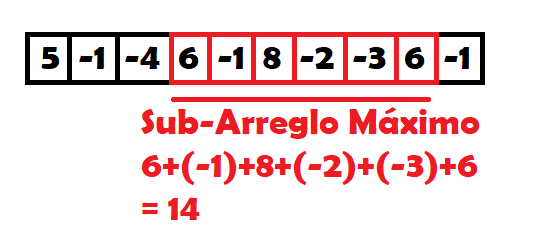

#Descripción del Algoritmo

El algoritmo MaxSubArray funciona de esta manera:
1. El arreglo se divide en dos partes (recursivamente).
2. Se busca el sub-arreglo máximo en cada división.
3. Se busca el sub-arreglo máximo que pasa por la división.
4. Se retorna el máximo sub-arreglo entre esos tres. 

Esto se repite recursivamente hasta conseguir el resultado que buscamos.


![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9vLW3LvvRI2CqBiXGFL7GdzLRaPdtaaANz4FwUvhNME1fSvq0MY4FKdn5PCeOYgsdyrY&usqp=CAU)

#Implementación del Algoritmo
El algoritmo MaxSubArray será implementado de manera recursiva, siguiendo la técnica _divide y vencerás_.

El siguiente código contiene las funciones MaxSubArray, la cuál es recursiva, y MaxSubArrayMid, la cuál busca el sub-arreglo máximo que pasa por el medio del arreglo. 

In [ ]:
def maxSubArrayMid(A, low, mid, high):
    #Parte Izquierda
    maxSumLeft = -1000000
    sum = 0
    for i in range(mid, low-1, -1):
        sum += A[i]
 
        if (sum > maxSumLeft):
            maxSumLeft = sum
            leftId = i

    #Parte Derecha
    maxSumRight = -1000000
    sum = 0
    for i in range(mid, high+1):
        sum += A[i]
 
        if (sum > maxSumRight):
            maxSumRight = sum
            rightId = i

    B = A[leftId:rightId+1]
    sumB = maxSumRight + maxSumLeft - A[mid]
    
    return B, leftId, rightId, sumB
 
 
def maxSubArray(A, low, high):
    global verbose

    if (low > high):
        return -1000000, -10000, -10000, -1000

    if (low == high):
        #if (verbose): print("n = 1")
        return A[low], low, high, A[low]

    global llamadas 
    mid = (low + high) // 2
    
    llamadas += 1
    leftArray, leftIdLeft, rightIdLeft, maxSumLeft = maxSubArray(A, low, mid-1)

    llamadas += 1
    rightArray, leftIdRight, rightIdRight, maxSumRight = maxSubArray(A, mid+1, high)

    midArray, leftIdMid, rightIdMid, maxSumMid = maxSubArrayMid(A, low, mid, high)

    global pasadas
    pasadas += 1
    if (verbose):
      print(colored(f"Pasada {pasadas}","green"),)
  
      print(colored("Sub-arreglo Izquierdo: ","blue"),end="")
      if not (hasattr(leftArray, "__len__")):
        print(colored("No hay"))
      else:
        print(f"{leftArray}")

      print(colored("Sub-arreglo Derecho: ","blue"),end="")
      if not(hasattr(rightArray, "__len__")):
        print("No hay")
      else:
        print(f"{rightArray}")
      
      print(colored("Sub-arreglo Medio: ","blue"),f"{midArray}\n")

    allMaxSum = max(maxSumLeft, maxSumRight, maxSumMid)
    if (allMaxSum == maxSumLeft): return leftArray, leftIdLeft, rightIdLeft, maxSumLeft
    if (allMaxSum == maxSumRight): return rightArray, leftIdRight, rightIdRight, maxSumRight
    return midArray, leftIdMid, rightIdMid, maxSumMid

In [ ]:
# M A I N
n = rd.randint(4, 30)
A = rd.sample(range(-100, 100), n)
llamadas = 0
pasadas = 0
verbose = False

print(colored("Entrada:", "red"),A,"\n")
maxArray, leftIdx, rightIdx, maxSum = maxSubArray(A, 0, n-1)
print(colored("Salida:","red"), maxArray)
if (verbose): print(colored(f"Llamadas recursivas: {llamadas}", "yellow"))

Entrada: [-38, 36, 45, 85, 6, 30, -76, 27, 10, 33, 62, 78, 75, 4, -45, 77, -53, 95, 40, -62, -18] 

Salida: [36, 45, 85, 6, 30, -76, 27, 10, 33, 62, 78, 75, 4, -45, 77, -53, 95, 40]


**Ejemplo con _verbose = True_**

In [ ]:
# verbose = True
n = rd.randint(4, 15)
A = rd.sample(range(-100, 100), n)
llamadas = 0
pasadas = 0
verbose = True

print(colored("Entrada:", "red"),A,"\n")
maxArray, leftIdx, rightIdx, maxSum = maxSubArray(A, 0, n-1)
print(colored("Salida:","red"), maxArray)
if (verbose): 
  print(colored(f"Llamadas recursivas: {llamadas}", "yellow"))
  print(colored(f"Comparaciones hechas: {pasadas}", "yellow"))

Entrada: [-99, 15, 69, 38, -7, 23, -49] 

Pasada 1
Sub-arreglo Izquierdo: No hay
Sub-arreglo Derecho: No hay
Sub-arreglo Medio:  [15, 69]

Pasada 2
Sub-arreglo Izquierdo: No hay
Sub-arreglo Derecho: No hay
Sub-arreglo Medio:  [23]

Pasada 3
Sub-arreglo Izquierdo: [15, 69]
Sub-arreglo Derecho: [23]
Sub-arreglo Medio:  [15, 69, 38, -7, 23]

Salida: [15, 69, 38, -7, 23]
Llamadas recursivas: 6
Comparaciones hechas: 3


#Propiedades del Algoritmo

###**Probar Correctitud de MaxSubArrayMid**
Comprobaremos si la función MaxSubArrayMid es correcta, usando inducción matemática, para eso hay que demostrar que funciona para:
- **Caso Base:** Teniendo un arreglo de largo $n$, con $n = 1$.
- **Caso General:** Cuando se tiene un arreglo de largo $n$, con $n > 1$.

Para esto, primero estudiaremos el caso base:  
Cuando se tiene un arreglo de un sólo elemento, éste conformará el sub-arreglo máximo, lógicamente.  
Esto comprueba que el algoritmo con el caso base es correcto.

Ahora, para demostrar el caso general, probaremos que el algoritmo es correcto para arreglos de largo $n$, con $n > 1$.  
Si estudiamos un arreglo de largo $n$, se conseguirá un sub-arreglo máximo izquierdo Array$[i, mid]$ y también un sub-arreglo máximo derecho Array$[mid+1, j]$, con tan sólo recorriendolos, y se retornará el arreglo de los dos concatenados. Esto demuestra que la función demuestra que cumple su cometido, retornando el sub-arreglo máximo.

###**Probar Correctitud de MaxSubArray**
Para esta fucnión también usaremos inducción matemática.

**Caso Base:**  
Con arreglos de largo $1$, este retornará sólo el elemento que contiene.

**Caso General:**  
Para este caso, tendremos que comprobar que la función es correcta para arreglos de largo $m$, con $m < n$.  
Si MaxSubArray recibe un arreglo de largo $n$, este se sub-dividirá, obteniendo arreglos de largo $m$, con $m = n/2$, de esta manera, se comprueba que la función es correcta. Después, estos arreglos reducidos se irán dividiendo recursivamente, hasta obtener múltiples casos bases, afirmando aún más que funciona en arreglos de largo $n$. 

###**Tiempo de ejecución**
Estudiaremos y analizaremos el tiempo de ejecución del algoritmo MaxSubArray.  
Como siempre, trabajaremos con un arreglo inicial de largo $n$.

**Método Maestro**  
Para empezar, averiguaremos el tiempo de ejecución de este algoritmo mediante un simpe método, que consiste en analizar la estructura de la función que representa MaxSubArray.  
- $T(n)= 2T(n/2) + O(n)$

Siguiendo la siguiente estructura: $T(n) \leq aT(n/b)+O(n^d)$, podemos darnos cuenta que para el algoritmo que estamos estudiando actualmente, los valores serían los siguientes:  
- $a = 2$
- $b = 2$
- $d = 1$

Teniendo estos valores, y observando las opciones que tenemos más abajo, podemos percatarnos que $a = b^d$, esto quiere decir que el tiempo de ejecución del algoritmo MaxSubArray es de $O(n \cdot logn)$.



![image.png](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F6be820c4-964e-44c1-acbd-db888889e8df%2FUntitled.png?table=block&id=1f05807a-07c4-4bd5-a59a-4402523d7383&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=1150&userId=&cache=v2)

**Método de Sustitución**  
Para asegurarnos el tiempo de ejecución es correcto, vamos a afirmarlo utilizando el método de sustitución.  
Como inicio, debemos tener una hipótesis, la cuál es que el tiempo de ejecución de este algoritmo es de $O(n \cdot logn)$.  
Hay que demostrar que $T(n) = O(n \cdot logn)$, para eso haremos pequeñas preparaciones para los cálculos futuros.
- $T(n) \leq d \cdot n \cdot logn$  

Teniendo que $T(n) = 2T(n/2) + O(n)$, cambiaremos la Big-O por una constante $c$, reemplazaremos lo que recibe $T$ recursivamente a la hipotética complejidad temporal y cada función $T$ a una $d$, obteniendo lo siguiente: 
- $2d \cdot n/2 \cdot log(n/2)+cn \leq dn \cdot logn$ 

Ahora hay que hacer cálculos matemáticos, y después de unos paso, se obtiene que:
- $dn \cdot logn - dn + cn \leq dn \cdot logn$

Analizando lo obtenido, se puede afirmar que para todo $d \geq c$, esta desigualdad se cumple, asegurándonos que el tiempo de ejecución del algoritmo MaxSubArray es $O(n \cdot logn)$.  

**Observación**  
Como la función maxSubArray funciona de manera recursiva, y siempre hace lo mismo, podemos afirmar que tanto el mejor como el peor caso son $O(n \cdot logn)$, por lo que la cota asintótica es $Θ(n \cdot logn)$

#Análisis y Experimentos


###**Competividad del Algoritmo**
Estudiaremos que tan eficiente y rápido es MaxSubArray contra otros algoritmos, en específico el algoritmo de Kadane.

El siguiente código pertenece al algoritmo de Kadane, el cuál se usará para los próximos estudios e investigaciones.


In [ ]:
#Kadane's Algoritm

def kadane(a,size):
    global comp
    max_so_far = -1000000
    max_ending_here = 0 
    for i in range(0, size):
        max_ending_here = max_ending_here + a[i]
        comp += 1
        if (max_so_far < max_ending_here):
            max_so_far = max_ending_here
        if max_ending_here < 0:
            max_ending_here = 0   
    return max_so_far
#This code is contributed by _Devesh Agrawal_
#from https://www.geeksforgeeks.org/largest-sum-contiguous-subarray/

**Tiempo de ejecución**  

Analizaremos el tiempo que tardan los dos algoritmos en encontrar el sub-arreglo máximo en arreglos iniciales de largo $n$, con $n \in [5, 500]$, compuesto por números $\in [-1000, 1000]$.

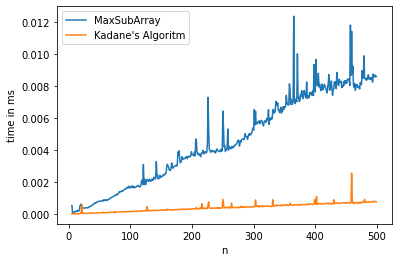

In [ ]:
x=[]; y=[]; y2=[]

for n in range(5,500):

  a = rd.sample(range(-1000, 1000), n)

  #la función repeat está ejecutando 20 veces InsertionSort con el arreglo a y retorna el mejor tiepo obtenido.
  t2 = repeat(setup="from __main__ import kadane", stmt=f"kadane({a}, {n-1})", repeat = 1, number = 10)
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a}, {0}, {n-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x, y2)
plt.legend(["MaxSubArray", "Kadane's Algoritm"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

**Análisis de Resultados**  

Tal y como se ve en el gráfico, la diferencia es abismal, debido a que el tiempo de ejecución del algoritmo de Kadane es menor, $O(n)$.  
Como habíamos observado anteriormente, la complejidad temporal del algoritmo MaxSubArray es $O(n \cdot logn)$, es por este motivo por el que el crecimiento del gráfico de este último es mucho mayor.

**Cantidad de comparaciones**  

Observaremos como se comportan la cantidad de comparaciones en los dos algoritmos.  
En MaxSubArray, tomaremos como comparación cuando se comprueba entre los tres sub-arreglos posibles, cuál es mayor. Veremos cómo se comportan en variados arreglos de largo $n$, con $n \in [5, 500]$, conteniendo números del $1$ al $1000$.

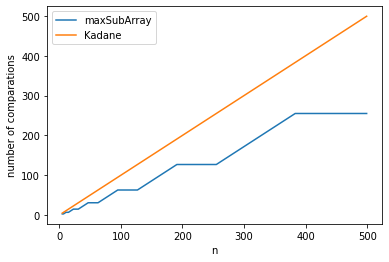

In [ ]:
x=[n for n in range(5,500)] 
y=[];
y2=[]; 

verbose = False

for n in range(5, 500):
  pasadas = 0
  comp = 0
  A = rd.sample(range(-1000, 1000), n)

  maxSubArray(A, 0, n-1)
  kadane(A, n)

  y.append(pasadas)
  y2.append(comp)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["maxSubArray", "Kadane"])

plt.xlabel('n')
plt.ylabel('number of comparations')
plt.show()

**Análisis de Resultados**  

Durante el algoritmo de Kadane, las comparaciones ocurren mientras se recorre el arreglo de largo $n$, eso quiere decir que siempre va a haber $n$ comparaciones, por este motivo es que el gráfico es lineal.  
En cambio, en el algoritmo MaxSubArray, las comparaciones ocurren sólo después de las llamadas recursivas, eso quiere decir que van a ser menos.

**Resultados de las Funciones**

Sabemos que los dos algoritmos funcionan y trabajan de distinta forma, utilizando diferentes métodos, pero ... ¿Es cierto que los resultados de los dos algoritmos son los mismos?  
Lo comprobaremos con un simple gráfico, utilizando arreglos de largo $n$, con $n \in [5, 100]$, con números entre $-1000$ y $1000$.  
Modificaremos un poco el gráfico, y para los resultados del algoritmo de Kadane, los mostraremos con valores negativos para que no se solapen y tapen los resultados con los del algoritmo maxSubArray.

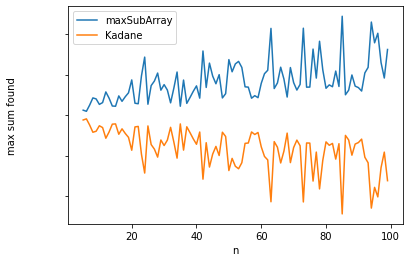

In [ ]:
x=[n for n in range(5,100)];
y=[];
y2=[];
verbose = False

for n in range(5, 100):
  A = rd.sample(range(-1000, 1000),n)

  kad = kadane(A, n)
  msb, li, ri, sum = maxSubArray(A, 0, n-1)

  y.append(sum)
  y2.append(-kad)

plt.plot(x, y)
plt.plot(x, y2)
plt.legend(["maxSubArray", "Kadane"])

plt.xlabel('n')
plt.yticks(color='white')
plt.ylabel('max sum found')
plt.show()

**Análisis de Resultados**  
Con este gráfico, podemos afirmar que los dos códigos funcionan correctamente y cumplen su objetivo, encontrando la suma máxima posible, debido a que los dos gráficos son idénticos.